<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITxT%2014.310xDASS/Notebooks/social_w7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Revisiting Regression Models

- Where the model comes from
- Reporting $r^2$
- Connections to Maximum Likelihood
- Building and interpreting linear models with R
- Comparing to our machine learning models using `caret`

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
wage_1 <- read_csv('census_wages.csv')
head(wage_1, 3)

New names:
• `` -> `...1`
Rows: 534 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): SOUTH, SEX, UNION, RACE, OCCUPATION, SECTOR, MARR
dbl (5): ...1, EDUCATION, EXPERIENCE, WAGE, AGE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried


In [ ]:
model1 <- lm(WAGE ~ AGE, data = wage_1)
model1


Call:
lm(formula = WAGE ~ AGE, data = wage_1)

Coefficients:
(Intercept)          AGE  
    6.16747      0.07755  


In [ ]:
summary(model1)


Call:
lm(formula = WAGE ~ AGE, data = wage_1)

Residuals:
   Min     1Q Median     3Q    Max 
-8.425 -3.503 -1.106  2.276 36.704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.16747    0.72280   8.533  < 2e-16 ***
AGE          0.07755    0.01870   4.147 3.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.063 on 532 degrees of freedom
Multiple R-squared:  0.03132,	Adjusted R-squared:  0.0295 
F-statistic:  17.2 on 1 and 532 DF,  p-value: 3.917e-05


In [ ]:
#model predicts with 20 year old?
20*.07755 + 6.16747

[1] 7.71847

In [ ]:
30*.07755 + 6.16747

[1] 8.49397

In [ ]:
40*.07755 + 6.16747

[1] 9.26947

In [ ]:
9.26947 - 8.49397

[1] 0.7755

In [ ]:
model2 <- lm(WAGE ~ AGE + RACE, data = wage_1)

In [ ]:
model2


Call:
lm(formula = WAGE ~ AGE + RACE, data = wage_1)

Coefficients:
(Intercept)          AGE    RACEOther    RACEWhite  
     4.6358       0.0767       0.5515       1.8132  


In [ ]:
summary(model2)


Call:
lm(formula = WAGE ~ AGE + RACE, data = wage_1)

Residuals:
   Min     1Q Median     3Q    Max 
-8.670 -3.357 -1.075  2.163 36.440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.63577    1.16440   3.981 7.81e-05 ***
AGE          0.07670    0.01865   4.114 4.52e-05 ***
RACEOther    0.55150    1.15064   0.479   0.6319    
RACEWhite    1.81316    1.00065   1.812   0.0706 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.042 on 530 degrees of freedom
Multiple R-squared:  0.04283,	Adjusted R-squared:  0.03741 
F-statistic: 7.904 on 3 and 530 DF,  p-value: 3.635e-05


### Employee Wages

In [ ]:
employees <- read_csv('employee_salaries.csv')
head(employees, 3)

New names:
• `` -> `...1`
Rows: 9228 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): full_name, gender, department, department_name, division, assignmen...
dbl (5): ...1, current_annual_salary, 2016_gross_pay_received, 2016_overtime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,full_name,gender,current_annual_salary,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,"Aarhus, Pam J.",F,69222.18,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records Management Section,Fulltime-Regular,Office Services Coordinator,NA,09/22/1986,1986
1,"Aaron, David J.",M,97392.47,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NA,09/12/1988,1988
2,"Aaron, Marsha M.",F,104717.28,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NA,11/19/1989,1989


In [ ]:
sum(is.na(employees$gender))

[1] 17

In [ ]:
?replace_na

In [ ]:
employees$gender <- replace_na(employees$gender, 'unknown')

In [ ]:
model <- lm(current_annual_salary ~ gender, data = employees)

In [ ]:
summary(model)


Call:
lm(formula = current_annual_salary ~ gender, data = employees)

Residuals:
   Min     1Q Median     3Q    Max 
-63924 -21033  -3622  17686 228020 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71028.4      475.4 149.395  < 2e-16 ***
genderM         4042.4      616.3   6.559 5.72e-11 ***
genderunknown -21298.6     7058.5  -3.017  0.00256 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29040 on 9225 degrees of freedom
Multiple R-squared:  0.005854,	Adjusted R-squared:  0.005639 
F-statistic: 27.16 on 2 and 9225 DF,  p-value: 1.731e-12


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


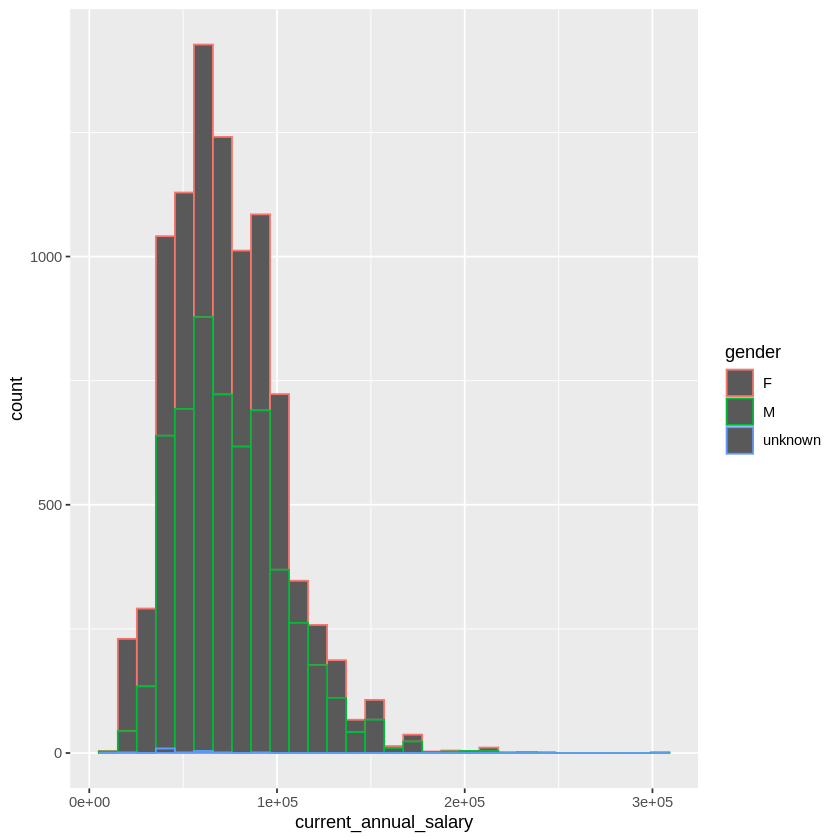

In [ ]:
ggplot(employees, aes(x = current_annual_salary, color = gender)) +
  geom_histogram()

In [ ]:
employees %>%
  group_by(gender) %>%
  summarise(mean(current_annual_salary))

gender,mean(current_annual_salary)
<chr>,<dbl>
F,71028.44
M,75070.80
unknown,49729.82


In [ ]:
filter(employees, gender == 'unknown')

...1,full_name,gender,current_annual_salary,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
23,"Abraham, Teanna M.",unknown,58000,NA,NA,REC,Department of Recreation,Neighborhood Senior Centers - Northern,Fulltime-Regular,Recreation Specialist,NA,12/27/2016,2016
2043,"Delos Reyes, Edwin John J.",unknown,42000,NA,NA,DGS,Department of General Services,Central Duplicating,Fulltime-Regular,Printing Technician III,Printing Technician I,12/27/2016,2016
2322,"Dunkes, Christopher B.",unknown,53788,33038.59,3042.66,POL,Department of Police,PSB 2nd District Patrol,Fulltime-Regular,Police Officer III,Police Officer I,02/24/2014,2014
4283,"Jones, Jacqueline A.",unknown,44175,NA,NA,HHS,Department of Health and Human Services,Infants and Toddlers,Fulltime-Regular,Program Aide,NA,12/27/2016,2016
4666,"Kranking, Stephen N.",unknown,39257,NA,NA,POL,Department of Police,MSB Communications Division,Fulltime-Regular,Public Safety Communications Specialist III,Public Safety Communications Specialist I,12/27/2016,2016
4886,"Lee, Robert S.",unknown,86225,NA,NA,DOT,Department of Transportation,Traffic Engineering and Operations Management Services,Fulltime-Regular,Information Technology Specialist III,NA,12/27/2016,2016
5352,"Martinez, Pahola S.",unknown,23920,NA,NA,CUS,Community Use of Public Facilities,Community Use of Public Facilities,Parttime-Regular,Principal Administrative Aide,NA,12/27/2016,2016
5373,"Martins, Diana S.",unknown,57230,NA,NA,HHS,Department of Health and Human Services,Emergency Housing Assistance,Fulltime-Regular,Social Worker II,NA,12/27/2016,2016
6497,"Patterson, D'Tanyon L.",unknown,56733,38407.14,4364.51,COR,Correction and Rehabilitation,DS MCCF Unit 1 Security,Fulltime-Regular,Correctional Officer III (Corporal),NA,08/26/2013,2013


#### Citizens Wages